In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics

from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error

from sklearn.model_selection import train_test_split

from sklearn.impute import SimpleImputer

from mlxtend.preprocessing import minmax_scaling
# for Box-Cox Transformation
from scipy import stats

from sklearn.metrics import roc_auc_score

In [2]:
df = pd.read_csv('/kaggle/input/financialresilience1234/Train.csv')

In [3]:
submission = pd.read_csv('/kaggle/input/financialresilience1234/SampleSubmission.csv')

In [4]:
test = pd.read_csv('/kaggle/input/financialresilience1234/Test.csv')

In [5]:
variable = pd.read_csv('/kaggle/input/financialresilience1234/VariableDefinitions.csv')
variable.iloc[:,:2]

,ID,Person unique/random identification
0,country,The country
1,region,"Region of a given country,.i.e., South Asia, E..."
2,population,The population of the given country
3,age,Individual age
4,Q1,Has ATM/debit card
5,Q2,Is the ATM connect to an account with your name?
6,Q3,Purchased with the ATM
7,Q4,Use of mobile or internet to make payments or ...
8,Q5,Mobile/internet to check account balance
9,Q6,Has a credit card


In [295]:
X = df.drop(['target','ID'],axis=1)
y = df.target
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,
                                                      random_state=0)

In [296]:
from sklearn.impute import SimpleImputer

In [6]:
#missing data percentage (Train Data)
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Q7,84226,80.3
Q23,67287,64.2
Q3,59653,56.9
Q2,57146,54.5
Q4,47422,45.2
Q5,47422,45.2
Q27,46438,44.3
Q8,45838,43.7
Q9,45838,43.7
Q28,31005,29.6


In [298]:
# Fill in the lines below: imputation
smimpute = SimpleImputer()

In [299]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(83893, 34)
region           539
age              237
Q2             45733
Q3             47753
Q4             37996
Q5             37996
Q7             67314
Q8             36705
Q9             36705
Q19            19313
Q20            19313
Q23            53831
Q26            19313
Q27            37127
owns_mobile        1
Q28            24768
dtype: int64


In [300]:
X_train.isnull().sum().loc[X_train.isnull().sum()>0].index

Index(['region', 'age', 'Q2', 'Q3', 'Q4', 'Q5', 'Q7', 'Q8', 'Q9', 'Q19', 'Q20',
       'Q23', 'Q26', 'Q27', 'owns_mobile', 'Q28'],
      dtype='object')

In [301]:
test[['population', 'Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14',\
        'Q15', 'Q16', 'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25']]

,population,Q1,Q6,Q10a,Q10b,Q11,Q12,Q13a,Q14,Q15,Q16,Q17a,Q17b,Q21,Q22,Q24,Q25
0,3.557444e+06,2,1,2,3,2,1,1,2,2,2,2,2,2,1,2,2
1,1.292017e+07,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2
2,3.791520e+06,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1
3,1.105668e+08,1,1,1,1,2,1,1,2,2,2,2,2,1,1,1,1
4,2.555017e+07,1,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44938,1.731874e+06,1,1,2,2,1,1,1,1,2,2,2,2,1,2,2,2
44939,7.492988e+06,1,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2
44940,4.591023e+06,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2
44941,1.461474e+07,2,2,2,2,2,2,2,2,2,2,2,1,1,2,2,2


In [302]:
prd = None
prd2 = None

In [303]:
# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    global prd
    global prd2
    model = RandomForestClassifier(n_estimators=100, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid)
    tstpr = test[['population', 'Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14',\
        'Q15', 'Q16', 'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25']]
    
    prd = model.predict(tstpr)
    prd2 = model.predict_proba(tstpr)[:,1]
    return mean_absolute_error(y_valid, preds)

    

In [304]:
drop_X_valid.columns , drop_X_train.columns

(Index(['population', 'Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14',
        'Q15', 'Q16', 'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25'],
       dtype='object'),
 Index(['population', 'Q1', 'Q6', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14',
        'Q15', 'Q16', 'Q17a', 'Q17b', 'Q21', 'Q22', 'Q24', 'Q25'],
       dtype='object'))

In [305]:
drop_X_train = X_train.dropna(axis=1).select_dtypes(exclude=['object'])
drop_X_valid = X_valid.dropna(axis=1).drop(['owns_mobile'],axis=1).select_dtypes(exclude=['object'])

print("MAE from Approach 1 (Drop categorical variables):")
print(score_dataset(drop_X_train, drop_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop categorical variables):
0.3213979212358158


In [306]:
submission['target'] = prd2

In [307]:
submission.target.value_counts()

1.000000    2958
0.990000     622
0.366575     513
0.980000     386
0.970000     316
            ... 
0.915556       1
0.711117       1
0.989028       1
0.271581       1
0.718091       1
Name: target, Length: 12485, dtype: int64

In [308]:
submission.to_csv('sub3.csv',index=False)

In [309]:
#missing data percentage (Train Data)
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
# missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
# missing_data

#missing data percentage (Train Data)
total2 = test.isnull().sum().sort_values(ascending=False)
percent_3 = test.isnull().sum()/test.isnull().count()*100
percent_4 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2,total2,percent_4], axis=1, keys=['Train', 'Trian%','Test','Test%'])
missing_data

,Train,Trian%,Test,Test%
Q7,84226,80.3,36069.0,80.3
Q23,67287,64.2,28943.0,64.2
Q3,59653,56.9,25595.0,56.9
Q2,57146,54.5,24527.0,54.5
Q4,47422,45.2,20384.0,45.2
Q5,47422,45.2,20384.0,45.2
Q27,46438,44.3,19837.0,44.3
Q8,45838,43.7,19700.0,43.7
Q9,45838,43.7,19700.0,43.7
Q28,31005,29.6,13433.0,29.6


In [7]:
cat_columns = df.select_dtypes(include=['object'])

In [8]:
cat_columns.region.value_counts()

Sub-Saharan Africa (excluding high income)            23893
High income: OECD                                     21258
Europe & Central Asia (excluding high income)         15022
Latin America & Caribbean (excluding high income)     11336
Middle East & North Africa (excluding high income)     9626
East Asia & Pacific (excluding high income)            9229
High income: nonOECD                                   7860
South Asia                                             5964
Name: region, dtype: int64

In [10]:
cat_columns.loc[cat_columns.country=='China']

,ID,country,region
51,ID_0004416647,China,East Asia & Pacific (excluding high income)
114,ID_0010769779,China,East Asia & Pacific (excluding high income)
121,ID_0011129333,China,East Asia & Pacific (excluding high income)
212,ID_0019513900,China,East Asia & Pacific (excluding high income)
281,ID_0027928169,China,East Asia & Pacific (excluding high income)
...,...,...,...
104789,ID_9990646312,China,East Asia & Pacific (excluding high income)
104802,ID_9992524274,China,East Asia & Pacific (excluding high income)
104832,ID_9995660666,China,East Asia & Pacific (excluding high income)
104834,ID_9995919479,China,East Asia & Pacific (excluding high income)


In [312]:
cat_columns.loc[cat_columns.region.isna()].country.value_counts()

Taiwan, China    679
Name: country, dtype: int64

In [313]:
def cat_preprocess(cat_columns):
    cat_columns.loc[cat_columns.country=='Taiwan, China'].fillna('East Asia')
    cat_columns.country.replace({'Taiwan, China':'Taiwan'})
    return cat_columns

In [314]:
cat_columns.loc[cat_columns.country=='Taiwan, China'].fillna('East Asia')

,ID,country,region
46,ID_0004282683,"Taiwan, China",East Asia
192,ID_0017803630,"Taiwan, China",East Asia
297,ID_0028885627,"Taiwan, China",East Asia
408,ID_0039620042,"Taiwan, China",East Asia
1145,ID_0108668033,"Taiwan, China",East Asia
...,...,...,...
104275,ID_9941075015,"Taiwan, China",East Asia
104352,ID_9948583907,"Taiwan, China",East Asia
104394,ID_9952680971,"Taiwan, China",East Asia
104452,ID_9957957637,"Taiwan, China",East Asia


In [315]:
cat_columns.loc[cat_columns.country=='Taiwan, China'].fillna('East Asia')

,ID,country,region
46,ID_0004282683,"Taiwan, China",East Asia
192,ID_0017803630,"Taiwan, China",East Asia
297,ID_0028885627,"Taiwan, China",East Asia
408,ID_0039620042,"Taiwan, China",East Asia
1145,ID_0108668033,"Taiwan, China",East Asia
...,...,...,...
104275,ID_9941075015,"Taiwan, China",East Asia
104352,ID_9948583907,"Taiwan, China",East Asia
104394,ID_9952680971,"Taiwan, China",East Asia
104452,ID_9957957637,"Taiwan, China",East Asia


In [316]:
def preprocessing():
    cat_columns = cat_columns.fillna('East Asia').replace({'Taiwan, China':'Taiwan'})
    

In [366]:
def preprocess(train,test):
    #catogiry
    
    cat_columns = train.select_dtypes(include=['object'])
    cat_columns = cat_columns.fillna('East Asia').replace({'Taiwan, China':'Taiwan'})
    
    train.loc[:,['country','region']]  = cat_columns[['country','region']]
    test.loc[:,['country','region']]  = cat_columns[['country','region']]
    
    #normalizaiont population
    normalized_data = stats.boxcox(original_data)
    df.population = normalized_data[0]
    #scaled 
#     scaled_data = minmax_scaling(df.population, columns=[0])
#     df.population = normalized_data[0]

# Fill in the median below: imputation
    smimpute = SimpleImputer(strategy='median')
    numeric_data = train.select_dtypes(exclude=['object'])
    imputed_with_median = pd.DataFrame(smimpute.fit_transform(numeric_data),columns=numeric_data.columns)
    train.loc[:,numeric_data.columns] = imputed_with_median

    
    numeric_datat = test.select_dtypes(exclude=['object'])
    imputed_with_mediant = pd.DataFrame(smimpute.fit_transform(numeric_datat),columns=numeric_datat.columns)
    test.loc[:,numeric_datat.columns] = imputed_with_mediant
    
    return train,test

In [320]:
original_data =  df.population

In [321]:
# mix-max scale the data between 0 and 1
scaled_data = minmax_scaling(df.population, columns=[0])

/opt/conda/lib/python3.7/site-packages/mlxtend/preprocessing/scaling.py:40: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ary_new = ary_new[:, np.newaxis]


In [322]:
# np.random.exponential(size=1000)

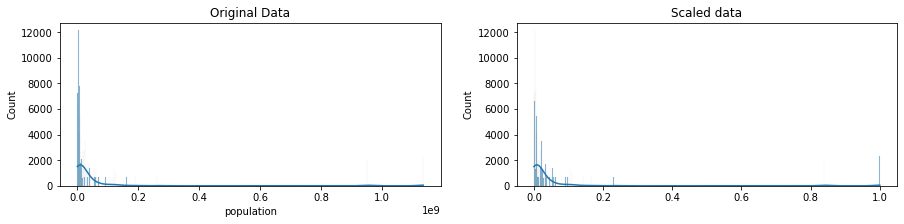

In [323]:
# plot both together to compare
fig, ax = plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df.population, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(scaled_data, ax=ax[1], kde=True, legend=False)
ax[1].set_title("Scaled data")
plt.show()

In [324]:
# normalize the exponential data with boxcox
normalized_data = stats.boxcox(original_data)

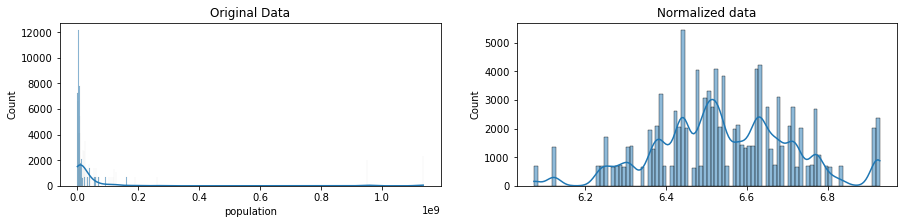

In [325]:
# plot both together to compare
fig, ax=plt.subplots(1, 2, figsize=(15, 3))
sns.histplot(df.population, ax=ax[0], kde=True, legend=False)
ax[0].set_title("Original Data")
sns.histplot(normalized_data[0], ax=ax[1], kde=True, legend=False)
ax[1].set_title("Normalized data")
plt.show()

In [326]:
#missing data percentage (Train Data)
total = df.isnull().sum().sort_values(ascending=False)
percent_1 = df.isnull().sum()/df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data

,Total,%
Q7,84226,80.3
Q23,67287,64.2
Q3,59653,56.9
Q2,57146,54.5
Q4,47422,45.2
Q5,47422,45.2
Q27,46438,44.3
Q8,45838,43.7
Q9,45838,43.7
Q28,31005,29.6


In [ ]:
numeric_data = df.select_dtypes(exclude=['object'])
numeric_data.columns
# Fill in the lines below: imputation
smimpute = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(smimpute.fit_transform(numeric_data),columns=numeric_data.columns)
df.loc[:,numeric_data.columns] = imputed_X_train

In [361]:
numeric_data = df.select_dtypes(exclude=['object'])
numeric_data.columns


Index(['population', 'age', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10a', 'Q10b', 'Q11', 'Q12', 'Q13a', 'Q14', 'Q15', 'Q16', 'Q17a',
       'Q17b', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27',
       'owns_mobile', 'Q28', 'target'],
      dtype='object')

In [362]:
# Fill in the lines below: imputation
smimpute = SimpleImputer(strategy='median')
imputed_X_train = pd.DataFrame(smimpute.fit_transform(numeric_data),columns=numeric_data.columns)

In [363]:
imputed_X_train

,population,age,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q21,Q22,Q23,Q24,Q25,Q26,Q27,owns_mobile,Q28,target
0,6.636597,66.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,0.0
1,6.445971,44.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2,6.636597,29.0,1.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,0.0
3,6.653823,44.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
4,6.753447,36.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104862,6.918383,48.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
104863,6.488673,16.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,1.0,...,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0
104864,6.238861,53.0,1.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,...,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,0.0
104865,6.731714,50.0,2.0,1.0,1.0,2.0,2.0,2.0,1.0,1.0,...,1.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0


In [364]:
df.loc[:,numeric_data.columns] = imputed_X_train

In [346]:
# df.isna().sum()

In [349]:
train, test = preprocess(df,test)

In [372]:
train,test = preprocess(df.copy(),test.copy())

In [373]:
train.isna().sum()

ID             0
country        0
region         0
population     0
age            0
Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10a           0
Q10b           0
Q11            0
Q12            0
Q13a           0
Q14            0
Q15            0
Q16            0
Q17a           0
Q17b           0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
owns_mobile    0
Q28            0
target         0
dtype: int64

In [374]:
train.to_csv('train1.csv',index=False)
test.to_csv('test2.csv',index=False)

# Category Encod

['country', 'region']

# Model1

In [ ]:
X = train.drop(['ID','target'],axis=1)
y = train.target

In [378]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Category Encoding

In [382]:
from sklearn.preprocessing import OneHotEncoder

s = (X_train.dtypes == 'object')
object_cols = list(s[s].index)
# Apply one-hot encoder to each column with categorical data
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(X_train[object_cols]))
OH_cols_valid = pd.DataFrame(OH_encoder.transform(X_valid[object_cols]))

# One-hot encoding removed index; put it back
OH_cols_train.index = X_train.index
OH_cols_valid.index = X_test.index

# Remove categorical columns (will replace with one-hot encoding)
num_X_train = X_train.drop(object_cols, axis=1)
num_X_valid = X_test.drop(object_cols, axis=1)

# Add one-hot encoded columns to numerical features
OH_X_train = pd.concat([num_X_train, OH_cols_train], axis=1)
OH_X_valid = pd.concat([num_X_valid, OH_cols_valid], axis=1)

In [402]:
OH_X_train.shape

(83893, 185)

In [383]:
from xgboost import XGBRegressor

my_model = XGBRegressor()
my_model.fit(OH_X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [401]:
# pred = my_model.predict(OH_X_valid)
pred = my_model.predict(OH_X_valid)
len(pred)

20974

In [398]:
roc_auc_score(y_test, pred)

0.7255257804738163

In [400]:
submission['target'] = my_model.predict(OH_X_valid)

ValueError: Length of values (20974) does not match length of index (44943)

In [403]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=6)

In [404]:
neigh.fit(OH_X_train, y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').